In [2]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 读取地块边界、DEM、坡度、坡向数据
#### 通过 掩膜 的方法，来获取数据
现在不用了，可以直接通过 rasterio 来读取路径上的数据，再通过 shapely 中的相关的操作直接计算距离

In [3]:
field_edge_path = '../Scratch/test_Load_Shp/shp_file/村地和道路/村地地块区域.shp'
dem_2m_path = 'GIS_data/路径规划优化用数据/2m_pClouds_regen_dem_cm.tif'
aspect_path = 'GIS_data/路径规划优化用数据/Aspect_clip_pcGen_2m_cm1.tif'
slope_path = 'GIS_data/路径规划优化用数据/Slope_clip_pcGen_2m_cm1.tif'

In [4]:
field_edge = gpd.read_file(field_edge_path)
with rasterio.open(dem_2m_path) as dem_src, rasterio.open(aspect_path) as aspect_src, rasterio.open(slope_path) as slope_src:
    dem_2m = dem_src.read(1)
    dem_2m_transform = dem_src.transform
    aspect_slope = aspect_src.read(1)
    aspect_transform = aspect_src.transform
    slope_degree = slope_src.read(1)
    slope_transform = slope_src.transform

In [5]:
[dem_2m.shape, aspect_slope.shape, slope_degree.shape]

[(507, 440), (507, 440), (507, 440)]

### 显示四个数据

[-32767, -3.402823e+38, -3.402823e+38]


(<AxesSubplot: title={'center': 'Degree'}>,
 Text(0.5, 1.0, 'Degree'))

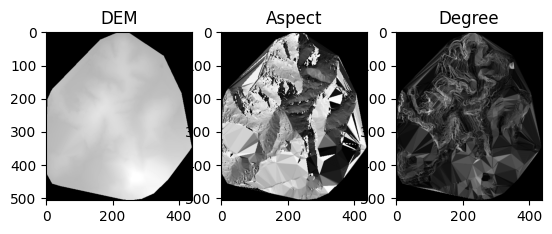

In [6]:
print([dem_2m.min(), aspect_slope.min(), slope_degree.min()])
# 对最小值进行更改，消除
dem_2m[dem_2m == dem_2m.min()] = 0
aspect_slope[aspect_slope == aspect_slope.min()] = 0
slope_degree[slope_degree == slope_degree.min()] = 0

plt.subplot(131), plt.imshow(dem_2m, cmap='gray'), plt.title('DEM')
plt.subplot(132), plt.imshow(aspect_slope, cmap='gray'), plt.title('Aspect')
plt.subplot(133), plt.imshow(slope_degree, cmap='gray'), plt.title('Degree')

In [7]:
x = 100 
y = 100
print(dem_2m[x][y])
print(aspect_slope[x][y])
print(slope_degree[x][y])

17012
347.8557
5.767913


In [8]:
# combine 3 rasters into 1
combined_raster = np.dstack((dem_2m, aspect_slope, slope_degree))
combined_raster = combined_raster.astype(np.float32)
[combined_raster.shape, combined_raster.dtype, combined_raster[x][y]]

[(507, 440, 3),
 dtype('float32'),
 array([1.701200e+04, 3.478557e+02, 5.767913e+00], dtype=float32)]

In [9]:
# save
np.save('GIS_data/路径规划优化用数据/dem_deg_aspe.npy', combined_raster)

### 只读取地块范围内的数据

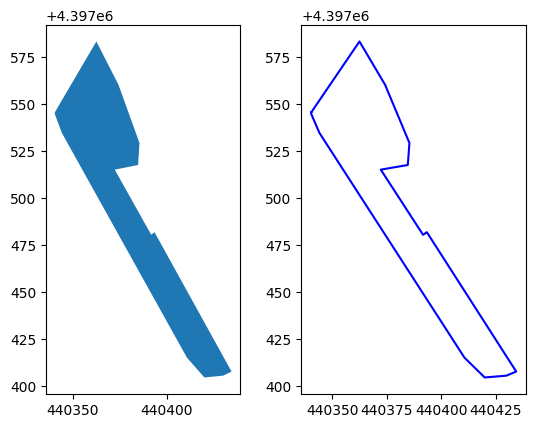

In [10]:
from CPP_Planner import CPP_Planner_Kit
single_land = CPP_Planner_Kit.get_single_shp(field_edge, 0)
single_land_exterior = single_land.geometry.iloc[0].exterior.xy
_, ax = plt.subplots(nrows=1, ncols=2)
ax1 = ax[0]
single_land.plot(ax=ax1)
ax2 = ax[1]
ax2.plot(*single_land_exterior, color='b')

### 查看一下当前读取出来的数据是什么样的

In [11]:
df_dem = pd.DataFrame(dem_2m)
df_dem

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
dem_2m_transform

Affine(2.0, 0.0, 439967.94999999995,
       0.0, -2.0, 4398004.3440000005)